<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe10-TopologicalSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento topológico

**Entrada**: Grafo dirigido sin ciclos $G=(V,E)$.

**Salida**: Una lista con el orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v) < f(w)$.

El ordenamiento topológico consiste en ordenar los vértices de un grafo $G$, de modo que cada nodo aparezca primero que sus descendientes. Esta propiedad deberá cumplirse para todos los nodos del grafo.

<img src="https://drive.google.com/uc?export=view&id=1gBqQ6sVMzLmZrcZm1nV2bbrHIo9CA4SC" width="800"/>

Para encontrar un orden topológico, no pueden existir ciclos en el grafo. Esto se puede notar fácilmente en la siguiente imagen.

<img src="https://drive.google.com/uc?export=view&id=1uLZ5NZxA_Jx-VEibIMVKKib9zhZOsbY_" width="300"/>

En este ejemplo, para cada par de nodos $(a, b)$ existe un camino $a \leadsto b$ y $b \leadsto a$. ¿Cuál nodo consideramos como descendiente del otro? En este caso, no es posible aplicar un ordenamiento topológico, pues es imposible respetar las restricciones de precedencia. Por lo tanto, el orden topológico solo es factible en un **grafo dirigido sin ciclos** (DAG).

El problema del orden topológico posee muchas aplicaciones, pues se puede aplicar en cualquier ámbito en que existan **relaciones de dependencia** entre los nodos. Por ejemplo, podría aplicarse para ordenar los ramos o asignaturas de la universidad en base a sus prerrequisitos. También se puede aplicar en la detección de ciclos en un grafo. Por ejemplo, el lenguaje de programación **Java** utiliza este algoritmo para manejar las relaciones de herencia entre clases, las cuales no pueden tener ciclos.


# 2. Topological Sort

## 2.1 Código

### Funciones auxiliares

In [269]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()

  for i in graph.keys():
    nxdigraph.add_node(i, symbol=None, order=None, state=0)
    for v in graph[i]:
      nxdigraph.add_node(v, symbol=None, order=None, state=0)
      nxdigraph.add_edge(i, v)

  for n in nxdigraph.nodes():
    nxdigraph.nodes[n]['symbol'] = int_to_alpha(n)

  return nxdigraph

def draw_graph(G):
  labels = dict()

  for i in G.nodes():
    labels[i] = G.nodes[i]['symbol'] + '\n' + str(G.nodes[i]['order'])

  pos = nx.spring_layout(G,k=10,seed=1)
  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='black')
  plt.show()
  plt.close()

def int_to_alpha(n):
  return chr(ord('a') + n)

### Topological Sort (DFS iterativo)

In [270]:
from termcolor import colored

# 0: No descubierto
# 1: Descubierto
# 2: Visitado

def DFS_iterativo(G, initial, cont, verbose=False):
  # Lista donde se guardarán los nodos ordenados de mayor a menor
  sorted = list()

  # Pila usada para recorrer los nodos en post-orden
  S = list()
  S.append(initial) # Insertamos el nodo inicial recibido como parámetro

  # Mientras haya nodos en la pila
  while len(S) > 0:
    n = S.pop() # Eliminamos el nodo

    if G.nodes[n]['state'] == 0: # Si el nodo no ha sido descubierto
      G.nodes[n]['state'] = 1 # Marcamos el nodo como descubierto
      S.append(n) # Lo insertamos a la pila

      # Obtenemos la lista de nodos adyacentes
      adj_list = list(reversed(list(G[n])))

      if verbose:
        print(f"Obteniendo nodos adyacentes de ", end='')
        print(f"{colored(G.nodes[n]['symbol'], 'blue')}: ", end='')
        for adj in range(len(adj_list)-1):
          print(G.nodes[adj_list[adj]]['symbol'], end='')
          print(', ', end='')
        if len(adj_list) > 0:
          print(G.nodes[adj_list[len(adj_list)-1]]['symbol'], end='')
        else:
          print('-', end='')
        print()

      # Recorremos los nodos adyacentes e insertamos los no descubiertos
      for adj in adj_list:
        if G.nodes[adj]['state'] == 0:
          S.append(adj)

    elif G.nodes[n]['state'] == 1: # Si el nodo ha sido descubierto
      G.nodes[n]['order'] = cont # Etiquetamos el nodo con su orden de visita
      G.nodes[n]['state'] = 2 # Marcamos el nodo como visitado
      sorted.append(int_to_alpha(n)) # Insertamos el nodo a la lista ordenada

      if verbose:
        print(f"Marcando nodo {colored(G.nodes[n]['symbol'], 'blue')} ", end='')
        print(f"con etiqueta {colored(cont, 'magenta')}")

      cont -= 1 # Disminuimos el contador en 1

  # Retornamos la lista ordenada de nodos y el contador actual
  return sorted, cont

Orden topológico: ['j', 'e', 'c', 'g', 'b', 'd', 'i', 'a', 'f', 'h']


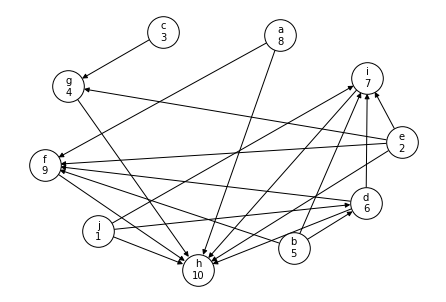

In [271]:
def topological_sort_iterativo(G, visualize=False, verbose=False):
  cont = len(G.nodes()) # Inicializamos el contador con la cantidad de nodos
  sorted = list() # Lista ordenada donde se guardarán los nodos

  for n in G.nodes(): # Recorremos los nodos del árbol
    if G.nodes[n]['state'] == 0: # Si el nodo no ha sido explorado
      if verbose == True:
        if cont == len(G.nodes()):
          print("Comenzando recorrido post-orden desde el nodo ", end='')
        else:
          print("\nContinuando recorrido post-orden desde el nodo ", end='')
        print(colored(G.nodes[n]['symbol'], 'blue'))

      # Aplicamos DFS con cada nodo no explorado
      sorted_subgraph, cont = DFS_iterativo(G, n, cont, verbose)
      sorted += sorted_subgraph # Concatenamos la sublista a la lista global

  sorted.reverse() # Invertimos la lista para mostrar los nodos de menor a mayor

  if verbose: print()
  if verbose or visualize:
    print(f"Orden topológico: {sorted}")
    draw_graph(G)

  return sorted # Retornamos la lista con el orden topológico

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
sorted = topological_sort_iterativo(G, True)

### Topological Sort (DFS recursivo)

In [272]:
def DFS_recursivo(G, initial, cont, sorted, verbose=False):
  G.nodes[initial]['state'] = 1 # Marcamos el nodo como descubierto

  # Obtenemos la lista con los nodos adyacentes
  adj_list = list(reversed(list(G[initial])))

  if verbose:
    print(f"Obteniendo nodos adyacentes de ", end='')
    print(f"{colored(G.nodes[initial]['symbol'], 'blue')}: ", end='')
    for adj in range(len(adj_list)-1):
      print(G.nodes[adj_list[adj]]['symbol'], end='')
      print(', ', end='')
    if len(adj_list) > 0:
      print(G.nodes[adj_list[len(adj_list)-1]]['symbol'], end='')
    else:
      print('-', end='')
    print()

  for adj in adj_list: # Recorremos los nodos adyacentes
    if G.nodes[adj]['state'] == 0: # Si el nodo no ha sido descubierto
      if verbose:
        print("Llamando recursivamente a DFS con nodo inicial ", end='')
        print(colored(G.nodes[adj]['symbol'], 'blue'))

      # Llamamos recursivamente a DFS con cada nodo adyacente no explorado
      cont, sorted = DFS_recursivo(G, adj, cont, sorted, verbose)

  G.nodes[initial]['order'] = cont # Etiquetamos el nodo con su orden de visita
  G.nodes[initial]['state'] = 2 # Marcamos el nodo como visitado
  sorted.append(int_to_alpha(initial)) # Insertamos el nodo a la lista ordenada

  if verbose:
    print(f"Marcando nodo {colored(G.nodes[initial]['symbol'], 'blue')} ", end='')
    print(f"con etiqueta {colored(cont, 'magenta')}")

  cont -= 1 # Disminuimos el contador en 1

  # Retornamos la lista ordenada de nodos y el contador actual
  return cont, sorted  

Orden topológico: ['j', 'e', 'c', 'g', 'b', 'd', 'i', 'a', 'f', 'h']


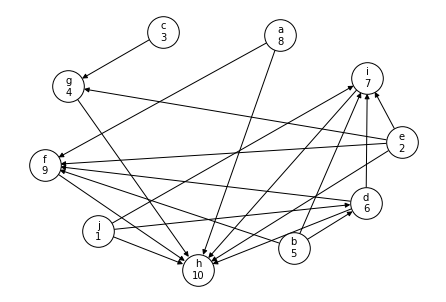

In [273]:
def topological_sort_recursivo(G, visualize=False, verbose=False):
  cont = len(G.nodes())
  sorted = list()

  for n in G.nodes(): # Recorremos los nodos del árbol
    if G.nodes[n]['state'] == 0: # Si el nodo no ha sido explorado
      if verbose:
        if cont == len(G.nodes()):
          print("Comenzando recorrido post-orden desde el nodo ", end='')
        else:
          print("\nContinuando recorrido post-orden desde el nodo ", end='')
        print(colored(G.nodes[n]['symbol'], 'blue'))

      # Aplicamos DFS con cada nodo no explorado
      cont, sorted = DFS_recursivo(G, n, cont, sorted, verbose)

  sorted.reverse() # Invertimos la lista para mostrar los nodos de menor a mayor

  if verbose: print()
  if verbose or visualize:
    print(f"Orden topológico: {sorted}")
    draw_graph(G)

  return sorted # Retornamos la lista con el orden topológico

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
sorted = topological_sort_recursivo(G, True)

## 2.2. Descripción del algoritmo

Ambos algoritmos reciben como entrada un grafo sin ciclos (DAG) y retornan el grafo con el valor asignado a cada nodo para cumplir con el orden topológico. Además, los pasos de ambos algoritmos son similares, puesto que la única diferencia radica en la implementación de la función **DFS**. Los pasos para resolver el algoritmo son los siguientes:

1. Se inicializa un contador global con la cantidad total de nodos del grafo.

2. Se llama a la función **DFS** a partir de un nodo no explorado.

3. Se recorren los nodos en **post-orden** y se asigna el valor del contador a cada nodo. Por cada visita, se disminuye el contador en 1.

4. Mientras existan nodos sin explorar, se repiten los pasos 2 y 3.

## 2.3 Ejemplo

El siguiente video muestra un ejemplo con los pasos a seguir para encontrar el orden topológico a partir de un grafo $G$:

<img src="https://drive.google.com/uc?export=view&id=1VWrvzt-R4gXYWrB45y-ZIuzBYnjmo16_" width="700"/>

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en los pasos de cada algoritmo:

In [274]:
from collections import defaultdict
import networkx as nx
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

Comenzando recorrido post-orden desde el nodo c
Obteniendo nodos adyacentes de c: e, j, a, h
Obteniendo nodos adyacentes de h: a, f
Obteniendo nodos adyacentes de f: a
Obteniendo nodos adyacentes de a: -
Marcando nodo a con etiqueta 10
Marcando nodo f con etiqueta 9
Marcando nodo h con etiqueta 8
Obteniendo nodos adyacentes de j: a
Marcando nodo j con etiqueta 7
Obteniendo nodos adyacentes de e: a
Marcando nodo e con etiqueta 6
Marcando nodo c con etiqueta 5

Continuando recorrido post-orden desde el nodo b
Obteniendo nodos adyacentes de b: d, h, a
Obteniendo nodos adyacentes de d: j, a, f
Marcando nodo d con etiqueta 4
Marcando nodo b con etiqueta 3

Continuando recorrido post-orden desde el nodo i
Obteniendo nodos adyacentes de i: d, h
Marcando nodo i con etiqueta 2

Continuando recorrido post-orden desde el nodo g
Obteniendo nodos adyacentes de g: e, j
Marcando nodo g con etiqueta 1

Orden topológico: ['g', 'i', 'b', 'd', 'c', 'e', 'j', 'h', 'f', 'a']


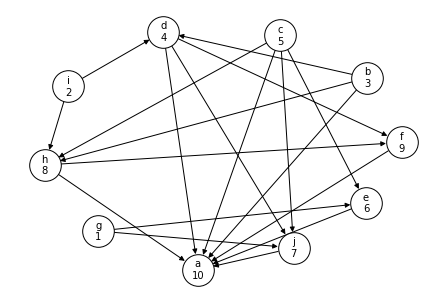

In [282]:
G = graph_instance_creator(10)
G = graph_to_nxdigraph(G)

sorted = topological_sort_iterativo(G, True, True)

Comenzando recorrido post-orden desde el nodo g
Obteniendo nodos adyacentes de g: b, h
Llamando recursivamente a DFS con nodo inicial b
Obteniendo nodos adyacentes de b: -
Marcando nodo b con etiqueta 10
Llamando recursivamente a DFS con nodo inicial h
Obteniendo nodos adyacentes de h: i, c, a, b
Llamando recursivamente a DFS con nodo inicial i
Obteniendo nodos adyacentes de i: b
Marcando nodo i con etiqueta 9
Llamando recursivamente a DFS con nodo inicial c
Obteniendo nodos adyacentes de c: i, b, a
Llamando recursivamente a DFS con nodo inicial a
Obteniendo nodos adyacentes de a: b
Marcando nodo a con etiqueta 8
Marcando nodo c con etiqueta 7
Marcando nodo h con etiqueta 6
Marcando nodo g con etiqueta 5

Continuando recorrido post-orden desde el nodo d
Obteniendo nodos adyacentes de d: f
Llamando recursivamente a DFS con nodo inicial f
Obteniendo nodos adyacentes de f: i, c
Marcando nodo f con etiqueta 4
Marcando nodo d con etiqueta 3

Continuando recorrido post-orden desde el nodo j


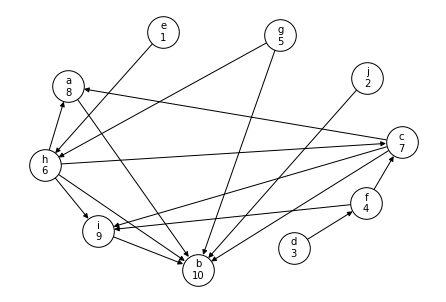

In [281]:
G = graph_instance_creator(10)
G = graph_to_nxdigraph(G)

sorted = topological_sort_recursivo(G, True, True)

# 3. Correctitud

### **Teorema 1: Correctitud de Topological Sorting**

*El algoritmo **Topological Sorting** retorna correctamente un ordenamiento topológico para un grafo dirigido sin ciclos con $n$ nodos.*

## Prueba del Teorema

### Hipótesis inductiva

*Al finalizar el algoritmo, para cualquier arco $(u, v)$ se cumple que $f(u) < f(v)$*

### Prueba por inducción

**Caso base**

Para $n = 1$, debido a que no existen arcos, siempre se cumplirá la propiedad, sin importar el valor asignado al único nodo del grafo.

**Paso inductivo**

Para $n > 1$, el algoritmo asigna un valor a cada nodo según el orden en que son visitados por la función **DFS**. Por lo tanto, nuestro principal enfoque estará en analizar el comportamiento de esta función.

En primer lugar, el algoritmo comienza a partir de un nodo no explorado del grafo (no existe ninguna otra restricción). Este nodo es insertado en una pila junto a sus nodos adyacentes, los cuales en conjunto serán marcados como *descubiertos*, para evitar volver a insertarlos en la pila posteriormente. Una vez terminado este paso, se continuará con el siguiente nodo en la pila, con el cual se repetirá el procedimiento anterior. 

Una vez hemos llegado a un nodo $x$ con una lista de adyacencia vacía, se marca el nodo como *visitado*, se le asigna como valor el contador global del algoritmo (el cual es inicializado con el número total de nodos), y se disminuye este contador en 1. Luego, existen dos casos para el siguiente elemento en la pila:

1. El siguiente nodo corresponde a un hermano de $x$. Para este nodo, se repite el algoritmo **DFS**. Asumiremos mediante el paso inductivo, que se cumple la hipótesis para este subgrafo.

2. El siguiente nodo corresponde al padre de $x$. Luego de asignar el valor $f(x)$ al nodo $x$, sabemos que el contador tendrá un valor menor a $f(x)$. Esto implica que el valor asignado al padre también será menor, cumpliéndose la hipótesis. 

Finalmente, como la hipótesis se cumple para el caso base y para el paso inductivo, queda demostrada la correctitud de **Topological Sorting**. $\Box$

# 4. Tiempo de ejecución

### **Teorema 2: Tiempo de ejecución del algoritmo Topological Sorting**

*El algoritmo **Topological Sorting** tiene un un tiempo de ejecución $\Theta(V + E)$.*

Definiremos $V$ como la cantidad de nodos o vértices del grafo, y $E$ como la cantidad de arcos. Ambas implementaciones del algoritmo almacenan cada nodo una sola vez en la pila, pues una vez recorrido se marca como *visitado* y se ignora en las siguientes iteraciones. Por lo tanto, procesar cada nodo del grafo tendrá una complejidad temporal de $\Theta(V)$.

Por otra parte, para obtener la lista de adyacencia de cada nodo, se debe iterar a través de todas sus conexiones. Repetir este paso por cada nodo se traduce en recorrer todas los arcos del grafo, por lo cual la complejidad temporal de este paso será $\Theta(E)$.

Finalmente, sumando las complejidades de estos dos procedimientos, obtendremos que el tiempo de ejecución del algoritmo es $\Theta(V + E)$. $\Box$



# 5. Experimentos

## 5.1 Tiempo experimental de Topological Sort

En este gráfico se comparará el tiempo de ejecución de las implementaciones iterativa y recursiva del algoritmo. El grafo de entrada será generado mediante la función `graph_instance_creator`, con $n$ en el rango de 10 a 200.

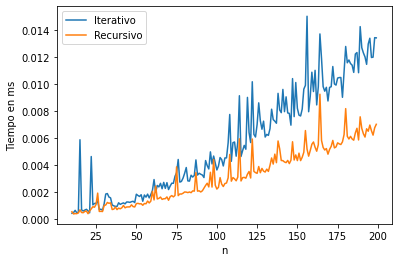

In [280]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]

for n in range(10,200):
  G = graph_instance_creator(n)
  G = graph_to_nxdigraph(G)
  H = G.copy()

  t1 = repeat(setup="from __main__ import topological_sort_iterativo", stmt=lambda: topological_sort_iterativo(G), repeat=1, number=10)
  t2 = repeat(setup="from __main__ import topological_sort_recursivo", stmt=lambda: topological_sort_recursivo(H), repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Iterativo", "Recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Podemos apreciar en el gráfico que el algoritmo recursivo presenta un mejor tiempo de ejecución en comparación al algoritmo iterativo. A simple vista, esto no parece tener sentido, pues sabemos que ambos algoritmos poseen la misma complejidad temporal $\Theta(V + E)$, sin embargo, existe una explicación para esto. 

Para un nodo $n$, el algoritmo **DFS recursivo** inserta uno a uno sus nodos adyacentes en la pila y los procesa de manera inmediata (usando el stack de la memoria), dejando la iteración del resto de nodos *en pausa*. Es posible que, al procesar un nodo adyacente de $n$, se disminuya la cantidad de nodos adyacentes de $n$ que serán insertados posteriormente en la pila. Recordemos que un nodo solo puede ser insertado en la pila si no ha sido descubierto, por lo cual, si se descubre antes, no será considerado.

En cambio, el algoritmo **DFS iterativo** no puede procesar los nodos adyacentes de manera inmediata, por lo cual todos los nodos que no hayan sido descubiertos hasta el comienzo de esta iteración, siempre serán procesados, lo que requiere un mayor número de comparaciones del estado de cada nodo.

Dicho de otra forma, el algoritmo recursivo puede *descubrir* nodos durante la iteración de los nodos adyacentes, evitando así que todos los nodos sean insertados y disminuyendo la cantidad de comparaciones.

## 5.2 Comparación con algoritmo de Kahn

A continuación se presenta un algoritmo alternativo para encontrar el orden topológico de un grafo, llamado **algoritmo de Kahn**. Los pasos de este algoritmo son los siguientes:

1. Seleccionar un nodo $u$ sin predecesores en el grafo.

2. Asignarle un valor $f(u)$ comenzando desde 1 y eliminarlo del grafo junto a sus arcos.

3. Repetir este paso hasta que no queden nodos.

### Código

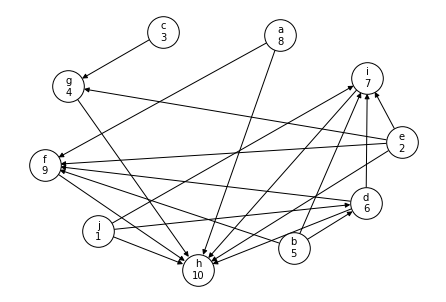

Orden topológico: ['j', 'e', 'c', 'g', 'b', 'd', 'i', 'a', 'f', 'h']


In [278]:
def kahn(G, visualize=False):
  u_list = list()
  ordered = list()

  if visualize:
    H = G.copy()

  for n in G.nodes():
    if len(list(G.predecessors(n))) == 0:
      u_list.append(n)

  cont = 1

  while len(u_list) > 0:
    u = u_list.pop()
    ordered.append(int_to_alpha(u))
    if visualize:
      H.nodes[u]['order'] = cont  

    cont += 1

    adj_list = reversed(list(G[u]))
    G.remove_node(u)

    for adj in adj_list:
      if len(list(G.predecessors(adj))) == 0:
        u_list.append(adj)

  if visualize:
    draw_graph(H)

  return ordered

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
nodes = kahn(G, True)
print(f"Orden topológico: {nodes}")

### Experimento

En este gráfico se comparará el tiempo de ejecución de las implementaciones anteriores junto al algoritmo de Kahn. El grafo de entrada será generado mediante la función `graph_instance_creator`, con $n$ en el rango de 10 a 200.

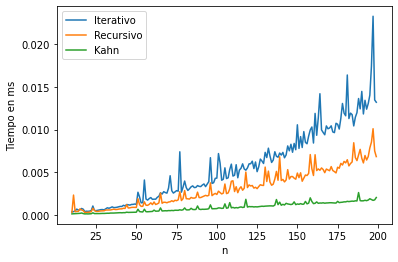

In [279]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat

x=[]; y1=[]; y2=[]; y3=[]

for n in range(10,200):
  G = graph_instance_creator(n)
  G = graph_to_nxdigraph(G)
  H = G.copy()
  I = G.copy()

  t1 = repeat(setup="from __main__ import topological_sort_iterativo", stmt=lambda: topological_sort_iterativo(G), repeat=1, number=10)
  t2 = repeat(setup="from __main__ import topological_sort_recursivo", stmt=lambda: topological_sort_recursivo(H), repeat=1, number=10)
  t3 = repeat(setup="from __main__ import khan", stmt=lambda: kahn(I), repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)
  y3.append(t3)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Iterativo", "Recursivo", "Kahn"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

El algoritmo de Kahn, al igual que los algoritmos vistos anteriormente, presenta una complejidad temporal de $O(V + E)$, puesto que se recorren todos los nodos del grafo pasando por todas sus conexiones.

Sin embargo, también observamos que este algoritmo posee un menor tiempo de ejecución. Esto podría deberse a que el algoritmo realiza una menor cantidad de comparaciones, al no utilizar el estado de cada nodo (no descubierto, descubierto y visitado) a la hora de recorrer el grafo. 